In [ ]:
!pip install matplotlib
!pip install pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
import pandas as pd

df = pd.DataFrame({
    'Age': [20, 22, 25, 27, 30, 32, 35, 37, 40, 45],
    'Experience': [1, 2, 4, 5, 7, 9, 10, 12, 15, 20]
})


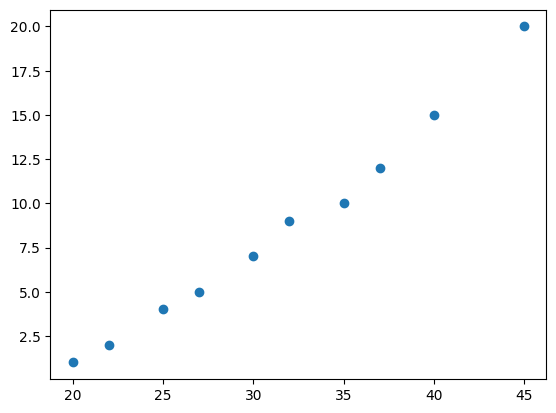

In [4]:
plt.scatter(df['Age'], df['Experience'], marker='o')

In [5]:
import numpy as np
class linear_reg():
    def __init__(self,epochs,lr):
        self.epochs = epochs
        self.lr = lr
    #Gradient Descent
    def fit_grad(self,X_train, y_train):


        #need to predict m and b
        self.m = 0
        self.b = 0
        n = len(X_train)
        ssd = []
        for _ in range(self.epochs):
            y_pred = self.m * X_train + self.b
            #dJ/dm and dJ/db
            D_m = (-2/n)*sum(X_train * (y_train - (self.m *(X_train) + self.b)))
            D_b = (-2/n)*sum(y_train - (self.m *(X_train) + self.b))

            self.m = self.m - self.lr * D_m
            self.b = self.b - self.lr * D_b

            #calculate the error
            error = (1/n) * sum((y_train - y_pred)**2)
            ssd.append(error)

    
        plt.plot(ssd)
        plt.xlabel("Epochs")
        plt.ylabel("Error")

        print("m:",self.m)
        print("b:",self.b)

    #Using the Normal Equation
    def fit_normal(self,X_train, y_train):
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)

        self.m = np.sum((X_train - X_mean) * (y_train - y_mean)) / np.sum((X_train - X_mean)**2)
        self.b = y_mean - self.m * X_mean

        print("m:",self.m)
        print("b:",self.b)
    
    def plot(self,X_train,y_train):
        plt.scatter(X_train, y_train, marker='o')
        y_pred = self.m * X_train + self.b
        plt.plot(X_train, y_pred, color='red')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    
    def predict(self, X_test):
        #use the m nd b to predict after using the fit() function
        y_pred = self.m * X_test + self.b
        return y_pred

In [6]:
l = linear_reg(epochs=100000,lr=0.0001)

m: 0.5942252220630178
b: -9.833010571568883


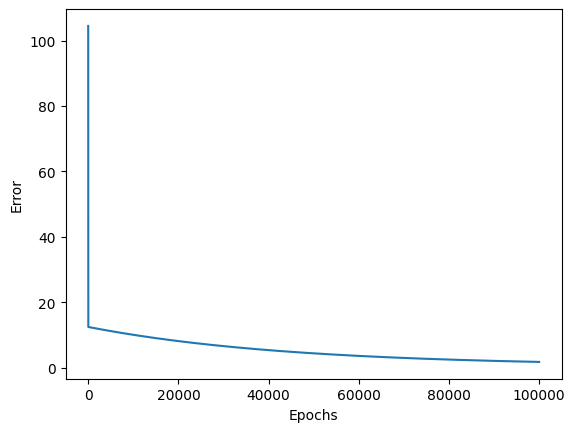

In [7]:
l.fit_grad(df["Age"],df["Experience"])

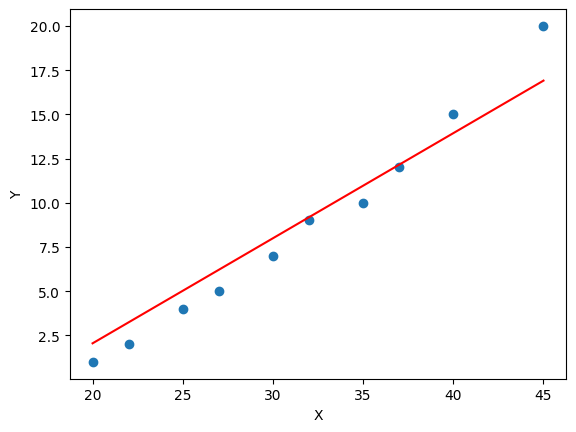

In [8]:
l.plot(df["Age"],df["Experience"])

In [9]:
l.predict(pd.Series([30,35,40]))

0     7.993746
1    10.964872
2    13.935998
dtype: float64

In [10]:
l.fit_normal(df["Age"],df["Experience"])

m: 0.7370313302516692
b: -14.569080636877246


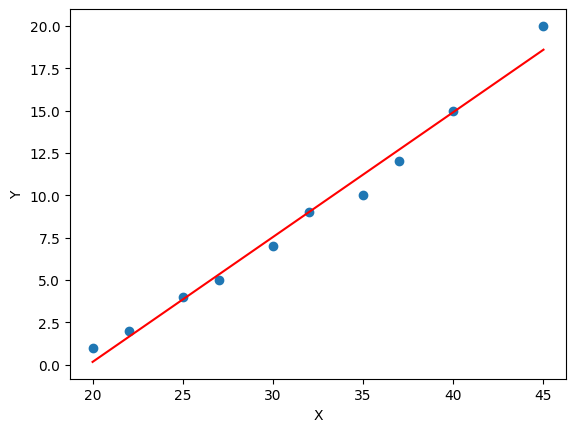

In [11]:
l.plot(df["Age"],df["Experience"])

In [12]:
l.predict(pd.Series([30,35,40]))

0     7.541859
1    11.227016
2    14.912173
dtype: float64